## Check how many neurIPS papers are from 1987 to 2019 (After 2019 they don't have public meta-data)

In [4]:
import json
import os

def count_texts_in_jsonl_files(folder_path):
    total_texts = 0

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(folder_path, file_name)

            # Open and read the JSONL file
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    try:
                        # Attempt to load each line as a JSON object
                        json.loads(line)
                        total_texts += 1
                    except json.JSONDecodeError:
                        # Skip the line if it's not a valid JSON object
                        continue

    return total_texts

# Specify the path to the folder containing your JSONL files
input_folder_path = 'src/data/'

# Count the number of texts
num_texts = count_texts_in_jsonl_files(input_folder_path)
print(f"Total number of texts in JSONL files: {num_texts}")


Total number of texts in JSONL files: 9680


## Now we start the keyword search

### Importing needed libraries

In [1]:
# Importing necessary functions and keyword lists
import sys
sys.path.append('src')  # Ensure the 'src' folder is in the Python path
sys.path.append('keyword_lists')  # Ensure the 'keyword_lists' folder is in the Python path

from arxiv_search import jsonl_folder_filtering
from keywords_auroc import auroc_search_terms
from keywords_auprc import auprc_search_terms

### Running search

In [2]:
# Specify the path to the folder containing your JSONL files
input_folder_path = 'data/neurIPS/'
output_folder_path = 'data'
metadata_keys = ['source_id', 'year', 'title', 'abstract']
# Call the jsonl_folder_filtering function

df_output_neurips = jsonl_folder_filtering(input_folder_path, auroc_search_terms, auprc_search_terms, 
                                   metadata_keys=metadata_keys,
                                   output_folder_path=output_folder_path,
                                   remove_latex=True,
                                   save_file=True,
                                   filename="neurIPS_filter_auc.csv")

In [3]:
df_output_neurips

,text,text_id,source_id,year,title,abstract,contains_auroc,contains_auprc
0,740 SPATIAL ORGANIZATION OF NEURAL NEn~O...,0,69,1987,Spatial Organization of Neural Networks: A Pro...,None,False,True
1,534 The Performance of Convex Set proje...,1,77,1987,The Performance of Convex Set Projection Based...,None,False,True
2,340 BACKPROPAGATION AND ITS APPLICATION TO...,2,105,1988,Backpropagation and Its Application to Handwri...,None,True,True
3,248 A CONNECTIONIST EXPERT SYSTEM THAT ACT...,3,135,1988,A Connectionist Expert System that Actually Works,None,True,False
4,99 Connectionist Learning of Expert Prefer...,4,142,1988,Connectionist Learning of Expert Preferences b...,None,False,True
...,...,...,...,...,...,...,...,...
949,The Cells Out of Sample (COOS) dataset and be...,948,1069,2019,The Cells Out of Sample (COOS) dataset and ben...,Understanding if classifiers generalize to out...,False,True
950,Speciﬁc and Shared Causal Relation Modeling an...,949,7490,2019,Specific and Shared Causal Relation Modeling a...,State-of-the-art approaches to causal discover...,False,True
951,Semi-Implicit Graph Variational Auto-Encoders ...,950,5716,2019,Semi-Implicit Graph Variational Auto-Encoders,Semi-implicit graph variational auto-encoder (...,True,True
952,GOT: An Optimal Transport framework for Graph ...,951,7760,2019,GOT: An Optimal Transport framework for Graph ...,We present a novel framework based on optimal ...,False,True


'figures/papers_over_time.png'

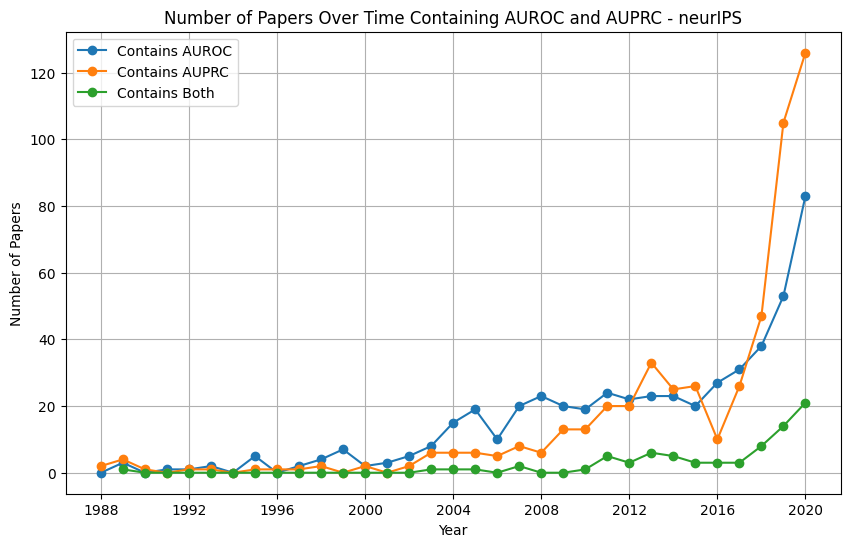

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Convert timestamp to datetime
df_output_neurips['year'] = pd.to_datetime(df_output_neurips['year'])

# Resample data by year
df_yearly = df_output_neurips.resample('Y', on='year').agg({'contains_auroc': 'sum', 'contains_auprc': 'sum'})

# Calculate papers that contain both
df_yearly['contains_both'] = df_output_neurips[(df_output_neurips['contains_auroc'] == True) & (df_output_neurips['contains_auprc'] == True)].resample('Y', on='year').size()

# File path for the figure
figures_dir = "figures"
figure_path = os.path.join(figures_dir, 'papers_over_time.png')

# Save the figure
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly['contains_auroc'], label='Contains AUROC', marker='o')
plt.plot(df_yearly.index, df_yearly['contains_auprc'], label='Contains AUPRC', marker='o')
plt.plot(df_yearly.index, df_yearly['contains_both'], label='Contains Both', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Over Time Containing AUROC and AUPRC - neurIPS')
plt.legend()
plt.grid(True)
plt.savefig(figure_path)

figure_path

## If you closed python, im loading csv again

In [8]:
import pandas as pd
from tqdm import tqdm
import re

# Load data
df_output_neurips = pd.read_csv('data/neurIPS_filter_auc.csv')

# Filter rows
df_output_neurips_filtered = df_output_neurips[(df_output_neurips['contains_auroc'] == True) & (df_output_neurips['contains_auprc'] == True)]


In [9]:
df_output_neurips_filtered

,text,text_id,source_id,year,title,abstract,contains_auroc,contains_auprc
2,340 BACKPROPAGATION AND ITS APPLICATION TO...,2,105,1988,Backpropagation and Its Application to Handwri...,NaN,True,True
60,Learning to Detect Natural Image Boundaries U...,60,2217,2002,Learning to Detect Natural Image Boundaries Us...,NaN,True,True
76,Using the Forest to See the Trees: A Graphical...,76,2386,2003,Using the Forest to See the Trees: A Graphical...,NaN,True,True
106,A Large Deviation Bound for the Area Under th...,106,2544,2004,A Large Deviation Bound for the Area Under the...,NaN,True,True
133,Multiple Instance Learning for Computer Aided ...,133,3124,2006,Multiple Instance Learning for Computer Aided ...,NaN,True,True
...,...,...,...,...,...,...,...,...
895,Variational Graph Recurrent Neural Networks E...,894,5712,2019,Variational Graph Recurrent Neural Networks,Representation learning over graph structured ...,True,True
928,Scalable Structure Learning of Continuous-Time...,927,2044,2019,Scalable Structure Learning of Continuous-Time...,Continuous-time Bayesian Networks (CTBNs) repr...,True,True
931,A New Perspective on Pool-Based Active Classiﬁ...,930,7813,2019,A New Perspective on Pool-Based Active Classif...,In many scientific settings there is a need fo...,True,True
937,A Meta-Analysis of Overﬁtting in Machine Learn...,936,4929,2019,A Meta-Analysis of Overfitting in Machine Lear...,We conduct the first large meta-analysis of ov...,True,True


### Ended with 78 relevant papers

### Now ready for gpt filtering